<a href="https://colab.research.google.com/github/aayushbokde/DL_study/blob/main/Transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aayushbokde","key":"030a8b2359d492026de6f61593d6ddda"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [5]:
!chmod 600 /root/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 87% 190M/218M [00:00<00:00, 782MB/s] 
100% 218M/218M [00:00<00:00, 743MB/s]


In [7]:
!ls /content/

 cat-and-dog.zip  'kaggle (1).json'   kaggle.json   sample_data


In [8]:
!unzip /content/cat-and-dog.zip -d /content/cat-and-dog

Streaming output truncated to the last 5000 lines.
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/cat-and-dog/training_set/training_set/cats/cat.3

In [29]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [30]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

In [31]:
from google.colab import files
files.upload()

Saving conv-layers-vgg16-1024x450.jpg to conv-layers-vgg16-1024x450 (1).jpg


{'conv-layers-vgg16-1024x450 (1).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x04\x05\x04\x04\x06\x05\x05\x05\x06\x06\x06\x07\t\x0e\t\t\x08\x08\t\x12\r\r\n\x0e\x15\x12\x16\x16\x15\x12\x14\x14\x17\x1a!\x1c\x17\x18\x1f\x19\x14\x14\x1d\'\x1d\x1f"#%%%\x16\x1c),($+!$%$\xff\xdb\x00C\x01\x06\x06\x06\t\x08\t\x11\t\t\x11$\x18\x14\x18$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\xff\xc0\x00\x11\x08\x01\xc2\x04\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x03\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x07\x08\x02\x04\x05\x03\x01\xff\xc4\x00`\x10\x00\x00\x05\x02\x02\x04\x07\t\x0b\x08\x07\x05\x07\x03\x04\x03\x00\x01\x02\x03\x04\x05\x06\x07\x11\x08\x12!Q\x1317At\xb2\xb3\x14\x1868au\x94\xb1\xd1\x15"3RUVqrs\x81\x93\x16#24\x91\xa1\xc1\xd2\x175BF\x84\xc2\xc3$TWb\x95%C\x92\xa2\xa4\xe1\xf0&S\x82Dd\xe2\xf1e\xa3\xe3\xff\xc4\x00\x1b\x01\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x0

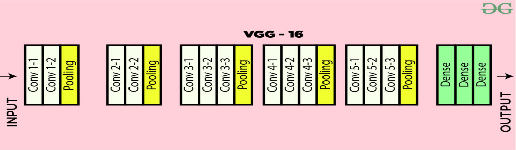

In [32]:
from tensorflow.keras.preprocessing import image
img_path = '/content/conv-layers-vgg16-1024x450.jpg'
img = image.load_img(img_path, target_size=(150, 516))
img

In [34]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(layer.name, layer.trainable)


block5_pool True


In [35]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [36]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [37]:
# GENERATOR
train_ds = keras.utils.image_dataset_from_directory(
    '/content/cat-and-dog/training_set/training_set',
    image_size=(150, 150),
    labels='inferred',
    label_mode='binary',
    batch_size=32
)

test_ds = keras.utils.image_dataset_from_directory(
    '/content/cat-and-dog/test_set/test_set',
    image_size=(150, 150),
    labels='inferred',
    label_mode='binary',
    batch_size=32
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [38]:
#NORMALIZE
def process(image, label):
  image = tensorflow.cast(image/255., tensorflow.float32)
  return image, label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [39]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# its a common practice to keep lr very low while fine tuning

In [40]:
history = model.fit(train_ds, validation_data = test_ds, epochs =10)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.8172 - loss: 0.3960 - val_accuracy: 0.8814 - val_loss: 0.2626
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.9316 - loss: 0.1703 - val_accuracy: 0.9165 - val_loss: 0.1919
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.9566 - loss: 0.1186 - val_accuracy: 0.9120 - val_loss: 0.2073
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - accuracy: 0.9690 - loss: 0.0853 - val_accuracy: 0.9377 - val_loss: 0.1609
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.9798 - loss: 0.0598 - val_accuracy: 0.9184 - val_loss: 0.2247
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.9895 - loss: 0.0395 - val_accuracy: 0.9323 - val_loss: 0.1753
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - accuracy: 0.9942 - loss: 0.0271 - val_accuracy: 0.9323 - val_loss: 0.2000
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.9963 - loss: 0

In [ ]:
# Fine Tuning gives better results than feature extracting